<a href="https://colab.research.google.com/github/lucelorr/pshab/blob/master/FashionMNIST_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.dtype

dtype('uint8')

In [5]:
# Las 5000 primeras muestras son el conjunto de validación.
valid_images, train_images = train_images[:5000]/255.0, train_images[5000:]/255.0
valid_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [6]:
# Lista de nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[train_labels[0]]

'Coat'

In [8]:
class_names[train_labels[1]]

'T-shirt/top'

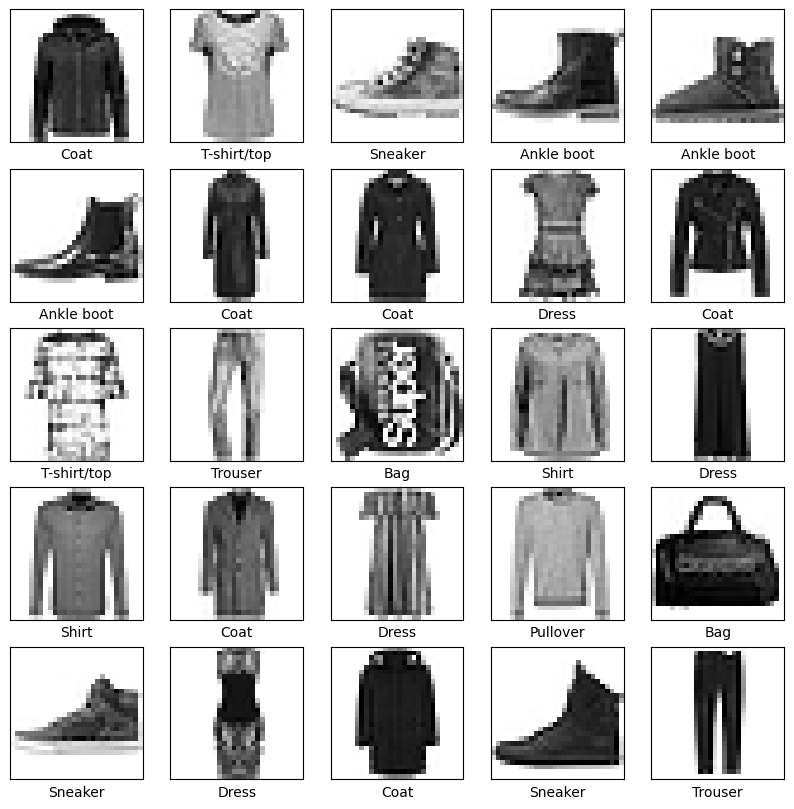

In [9]:
# Con el siguiente código se muestran los primeras 25 figuras
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

CONSTRUCCIÓN DEL MODELO

In [10]:
#Construimos la red neuronal
model= keras.models.Sequential() # Transforma el formato de las imagenes de un
# arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional
# (de 28*28 pixeles = 784 pixeles)
# Esta capa no tiene parametros; solo reformatea el set de datos.
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [11]:
# En lugar de añadir las capas de una en una, podemos pasar una lista de capas al crear un modelo Sequential
# model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape = [28, 28]),
#    keras.layers.Dense(300, activation ="relu"),
#    keras.layers.Dense(100, activation ="relu"),
#    keras.layers.Dense(10, activation ="softmax"),
# ])

In [12]:
model.summary()
# resumen que nos da las capas, las salidas y la forma y el número de parámetros

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.layers
# Con este comando obtengo una lista de capas del modelo

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
# Podemos acceder a los parámetros de una capa, tanto a los pesos de conexión como a los términos de sesgo
weights, biases = hidden1.get_weights()
weights

array([[ 0.06127268,  0.06482774,  0.06501871, ..., -0.0598858 ,
         0.04875221,  0.07147835],
       [-0.02976836,  0.02643518,  0.02643768, ...,  0.0529175 ,
        -0.07436076, -0.05547132],
       [ 0.02352625,  0.06766641, -0.01605808, ..., -0.00239042,
         0.02627349,  0.06030862],
       ...,
       [-0.06236479,  0.06849743, -0.02887921, ...,  0.02164614,
        -0.06615832, -0.06889519],
       [-0.00923227,  0.02234405,  0.01073813, ...,  0.04956542,
         0.06114781,  0.05230309],
       [ 0.05860245,  0.01978044, -0.06174437, ..., -0.06832457,
        -0.05146419,  0.04440095]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# El optimizador que usamos es el de Descenso del gradiente estocástico

ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

In [21]:
history = model.fit(train_images, train_labels, epochs = 30, validation_data = (valid_images, valid_labels))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7154 - accuracy: 0.7668 - val_loss: 0.5137 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4847 - accuracy: 0.8312 - val_loss: 0.4414 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4412 - accuracy: 0.8462 - val_loss: 0.4155 - val_accuracy: 0.8552
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4141 - accuracy: 0.8553 - val_loss: 0.4258 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.3797 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3788 - accuracy: 0.8672 - val_loss: 0.3762 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8717 - val_loss: 0.3679 - val_accuracy:

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [28]:
history.history

{'loss': [0.715421736240387,
  0.48471760749816895,
  0.4411645233631134,
  0.4141436517238617,
  0.393873929977417,
  0.37878745794296265,
  0.36504024267196655,
  0.3541303873062134,
  0.34395304322242737,
  0.33331605792045593,
  0.3242938816547394,
  0.31685322523117065,
  0.3103494942188263,
  0.3029918968677521,
  0.29560503363609314,
  0.2892107665538788,
  0.2843576967716217,
  0.2791670262813568,
  0.273824006319046,
  0.26853126287460327,
  0.2638278901576996,
  0.25947877764701843,
  0.2539532780647278,
  0.2505511939525604,
  0.24590490758419037,
  0.2426682859659195,
  0.23804989457130432,
  0.23388515412807465,
  0.23080675303936005,
  0.22708667814731598],
 'accuracy': [0.7668181657791138,
  0.8311636447906494,
  0.8462363481521606,
  0.8552908897399902,
  0.8619818091392517,
  0.8671636581420898,
  0.8716727495193481,
  0.8739818334579468,
  0.8776181936264038,
  0.8819454312324524,
  0.8848363757133484,
  0.8864908814430237,
  0.8893454670906067,
  0.8906727433204651,


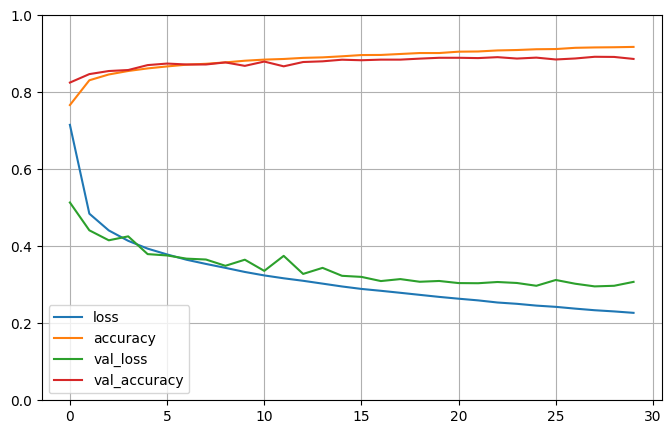

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # configura el rango vertical en [0, 1]
plt.show()

In [32]:
# Considero la evaluación con el conjunto de prueba
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 67.2323 - accuracy: 0.8359


[67.23231506347656, 0.8359000086784363]

USO DEL MODELO PARA HACER PREDICCIONES

In [33]:
# Noi habría que escalar las imágenes del conjunto de test?
X_new = test_images[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)